In [18]:
from scipy.stats import chi2, chi2_contingency
import pandas as pd
import numpy as np

# Q1
## Criminologist have long debated whether there is a relationship between weather conditions and the incidence of violent crime. The author of the article “Is There a Season for Homicide?” classified 1361 homicides according to season, resulting in the accompanying data. Test the null hypothesis of equal proportions using 𝛼 = 0.01. 


### Winter Spring Summer Fall
### 328 334 372 327


#### a. Give the null and alternative hypotheses.


$H_0 : \pi_{winter} = \pi_{spring} = \pi_{summer} = \pi_{Fall} = \frac{1}{4}$

$H_0$ indicates that there is no significant relationship between season and homocides

$H_a$ : at least one $\pi_{i} \neq \frac{1}{4}$

#### b. What is the expected count for each cell?


In [9]:
observed = [328,334,372,327]
df = len(observed) - 1
N = np.sum(observed)
expected = [N/len(observed)] * len(observed)
print(expected[0])

340.25


excpected count for each season is :  $\textbf{340.25}$

#### c. What is the value of the chi-squared test statistic?


In [7]:
test_statistic = np.sum([((o-e)**2)/e for o,e in zip(observed,expected)])
print(test_statistic)

4.034533431300514


chi-square test statistic is: $\textbf{4.034}$

#### d. What is the p-value?


In [10]:
p_val = 1- chi2.cdf(test_statistic, df)
print(p_val)

0.25775920748891


P value is $\textbf{.2577}$

#### e. What is your decision and conclusion?

Since the p-value (0.258) is greater than the significance level (α = 0.01), you do not have sufficient evidence to reject the null hypothesis. The decision is to fail to reject the null hypothesis.

The conclusion is that the data do not provide strong evidence to suggest that the proportions of homicides are different across the seasons. This means that, based on the chi-square test performed, there is no statistical reason to believe that the incidence of homicide is related to the season.

# Q2
## It is expected that the true blood types proportions for Americans is given in the table below. For a sample of 200 Americans, there blood types were tested and also are given in the table below. Use 𝛼 = 0.05.

### A B AB O

#### 89 18 12 81

#### 0.41 0.1 0.04 0.45


### a. Give the null and alternative hypotheses


In [16]:
observed = [89,18,12,81]
expected_probs = [.41,.1,.04,.45]

$$
H_0 :\\
\pi_{A} = .41\\
\pi_{B} = .1\\
\pi_{AB} = .04\\
\pi_{O} = .45\\
\\
H_1 : \\
at\ least\ one \ \pi_{i} \neq \pi_{i,0}
$$

### b. What are the expected counts for each category?


In [27]:
N = np.sum(observed)
expected = [N*e for e in expected_probs]
blood_types = ['A', 'B', 'AB', 'O']
expected_numbers = expected

# Create the DataFrame
df_blood_types = pd.DataFrame(data={'Blood Type': blood_types, 'Expected Number': expected_numbers})
df_blood_types.set_index("Blood Type",inplace=True)

df_blood_types


,Expected Number
Blood Type,
A,82.0
B,20.0
AB,8.0
O,90.0


### c. What is the chi-squared test statistic?


In [28]:
test_statistic = np.sum([((o-e)**2)/e for o,e in zip(observed, expected)])
test_statistic

3.6975609756097563

chi-square test statistic is :$\textbf{3.6975}$

### d. What is the chi-squared critical value (for the rejection region)?

In [29]:
chi2.ppf(.95,df)

7.814727903251179

 the chi-squared critical value is: $\textbf{7.8147}$

### e. What is your decision and conclusion?

Since the test statistic is smaller than the critical value we fail to reject the null hypothesis and we do not have enough evidence to reject that our sample portions is different from the populatopn porportion significantly

# Q3
## Three website designs are being compared. Sixty students have agreed to be subjects for the study, and they are randomly assigned (equally to each group) to watch of the designs for as long as they like. For each student, the study directors record whether or not the website is watched for more than a minute. For the first design, 16 students watched for more than a minute; for the second, 5 watched for more than a minute; for the third, 10 students watched for more than a minute.
#### a. What are the null and alternative hypotheses?


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

In [32]:
observed =  [
    [16, 20-16],
    [5,20-5],
    [10,20-10]
]

$H_0 : The number of students who keep wathcing the website is independent from the website design$

$H_a$ indicates that there is a significant relationship between number of students keep watching the website after a minute and the website design

#### b. What is the test statistic?


In [33]:
chi2_contingency(observed)

Chi2ContingencyResult(statistic=12.146829810901002, pvalue=0.0023032942332463255, dof=2, expected_freq=array([[10.33333333,  9.66666667],
       [10.33333333,  9.66666667],
       [10.33333333,  9.66666667]]))

test statistic is: $\textbf{12.1468}$

#### c. What is the p-value?


P value is $\textbf{0.0023}$

#### d. What is your decision and conclusion?


Since p value is less than level of significance we can reject the null hypothesis and coclude there is a relationship between the design and number of students who keep watching after a minute

#### e. Which website design would you recommend?

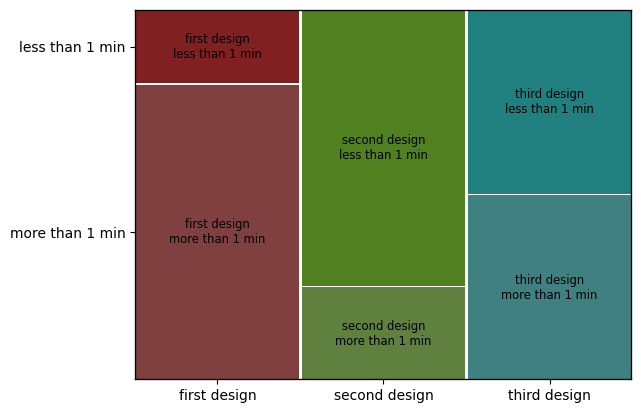

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

data = {
    ("first design","more than 1 min") : 16,
    ("second design","more than 1 min") : 5,
    ("third design","more than 1 min") : 10,
    ("first design","less than 1 min") : 4,
    ("second design","less than 1 min") : 15,
    ("third design","less than 1 min") : 10
}

mosaic(data)
plt.show()

we can see from the provided plot that the first design has the best success rate among all other designs so the first design is the best one to choose